In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import scanpy as sc

In [24]:
sc.settings.set_figure_params(dpi=80)

## PAGA with enterocytes reordered and EEC merged

In [36]:
# Set paths
input_data = '/groups/umcg-wijmenga/tmp01/users/umcg-aramirezsanchez/umcg-nribeiro/NR03_scRNAseq/ongoing/outputs/subclustering/epithelia_v3.h5ad'
out_path = '/groups/umcg-wijmenga/tmp01/users/umcg-aramirezsanchez/umcg-nribeiro/NR03_scRNAseq/ongoing/outputs/trajectory_analysis/'

In [37]:
# Load the data
epithelia_adata = sc.read_h5ad(input_data)
epithelia_adata

AnnData object with n_obs × n_vars = 10730 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'lane', 'SCT_snn_res.0.4', 'seurat_clusters', 'genotype', 'droplet', 'status', 'marsh', 'sex', 'age', 'batch', 'barcode', 'cell.type.1', 'cell.type.2', 'SCT_snn_res.0.7', 'SCT_snn_res.0.6', 'SCT_snn_res.0.65', 'SCT_snn_res.0.8', 'cell.type.3', 'cell.type.4'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

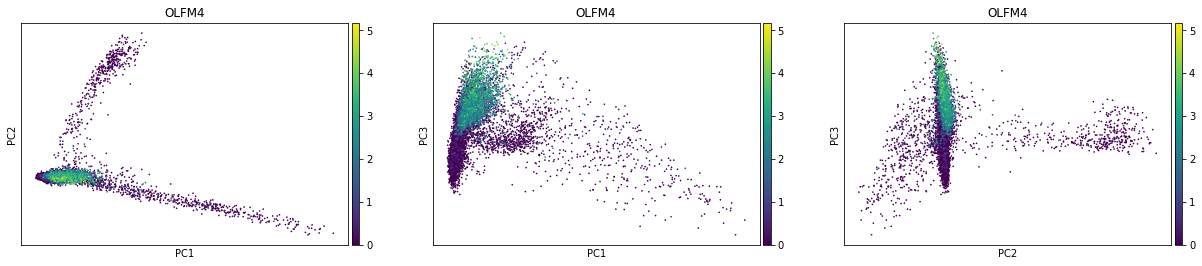

In [39]:
# Checking my PCs
sc.pl.pca(epithelia_adata, components=['1,2','1,3','2,3'], color = 'OLFM4') 

In [40]:
epithelia_adata

AnnData object with n_obs × n_vars = 10730 × 2000
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_SCT', 'nFeature_SCT', 'orig.ident', 'percent.mt', 'lane', 'SCT_snn_res.0.4', 'seurat_clusters', 'genotype', 'droplet', 'status', 'marsh', 'sex', 'age', 'batch', 'barcode', 'cell.type.1', 'cell.type.2', 'SCT_snn_res.0.7', 'SCT_snn_res.0.6', 'SCT_snn_res.0.65', 'SCT_snn_res.0.8', 'cell.type.3', 'cell.type.4'
    var: 'vst.mean', 'vst.variance', 'vst.variance.expected', 'vst.variance.standardized', 'vst.variable'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'

In [41]:
# Spliting into control and CeD
control = epithelia_adata[epithelia_adata.obs['status'] == 'Ctrl']
ced = epithelia_adata[epithelia_adata.obs['status'] == 'CeD']

In [42]:
# Calculating neighbors
sc.pp.neighbors(control, n_neighbors = 20, n_pcs = 50)
sc.pp.neighbors(ced, n_neighbors = 20, n_pcs = 50)

/local/1582454/ipykernel_12201/3353524019.py:2: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.neighbors(control, n_neighbors = 20, n_pcs = 50)
/local/1582454/ipykernel_12201/3353524019.py:3: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  sc.pp.neighbors(ced, n_neighbors = 20, n_pcs = 50)


In [43]:
# Running PAGA
sc.tl.paga(control, groups = 'cell.type.4')
sc.tl.paga(ced, groups = 'cell.type.4')

In [44]:
print(control.uns['paga']['connectivities_tree'])

  (0, 10)	0.2525683578315157
  (0, 13)	0.08762866576034181
  (2, 3)	0.8313283314276279
  (4, 3)	0.5547726219884632
  (4, 5)	1.0
  (6, 4)	1.0
  (7, 1)	1.0
  (7, 9)	0.48611995735694546
  (8, 12)	0.8347916938748856
  (9, 12)	1.0
  (10, 12)	1.0
  (11, 12)	1.0
  (12, 2)	0.6912245342950928


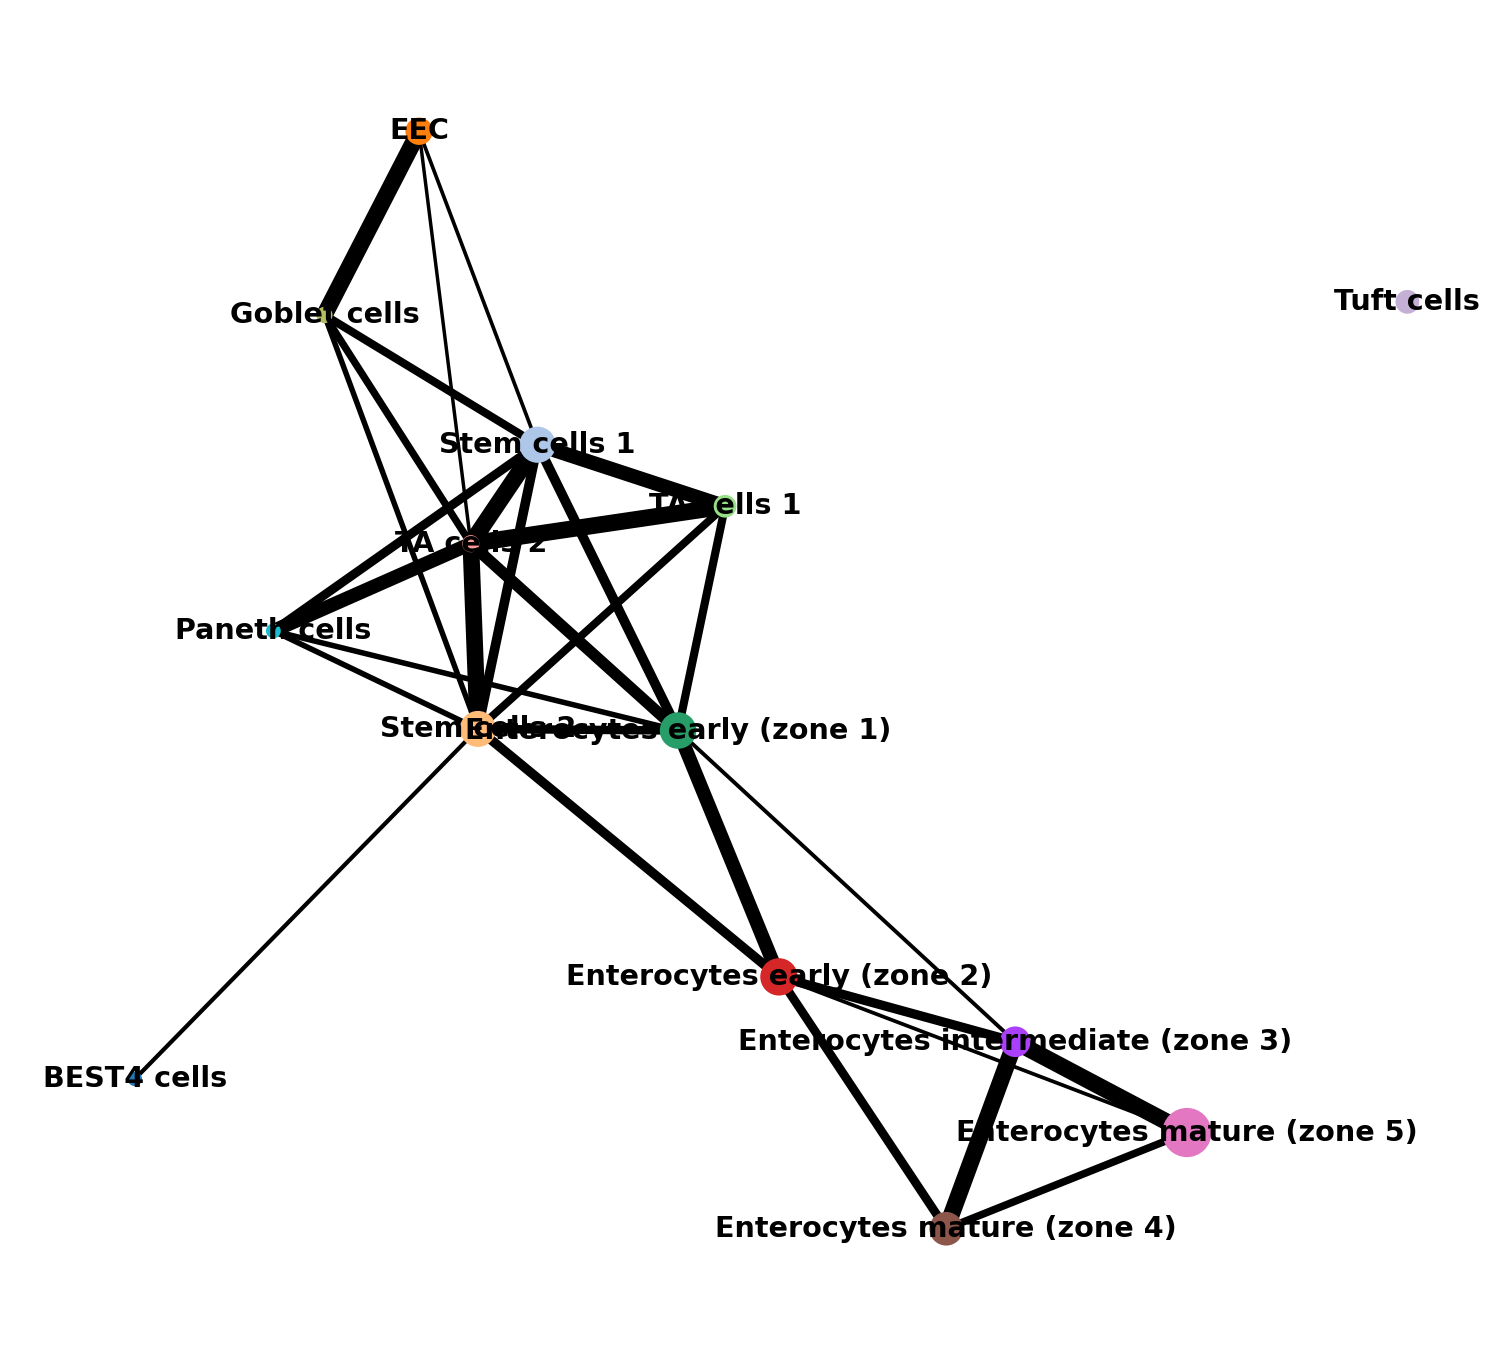

In [48]:
# Plotting PAGA - control
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(10, 10), facecolor='white')
sc.pl.paga(control, layout = 'fr', threshold = 0.2, node_size_power = 1)

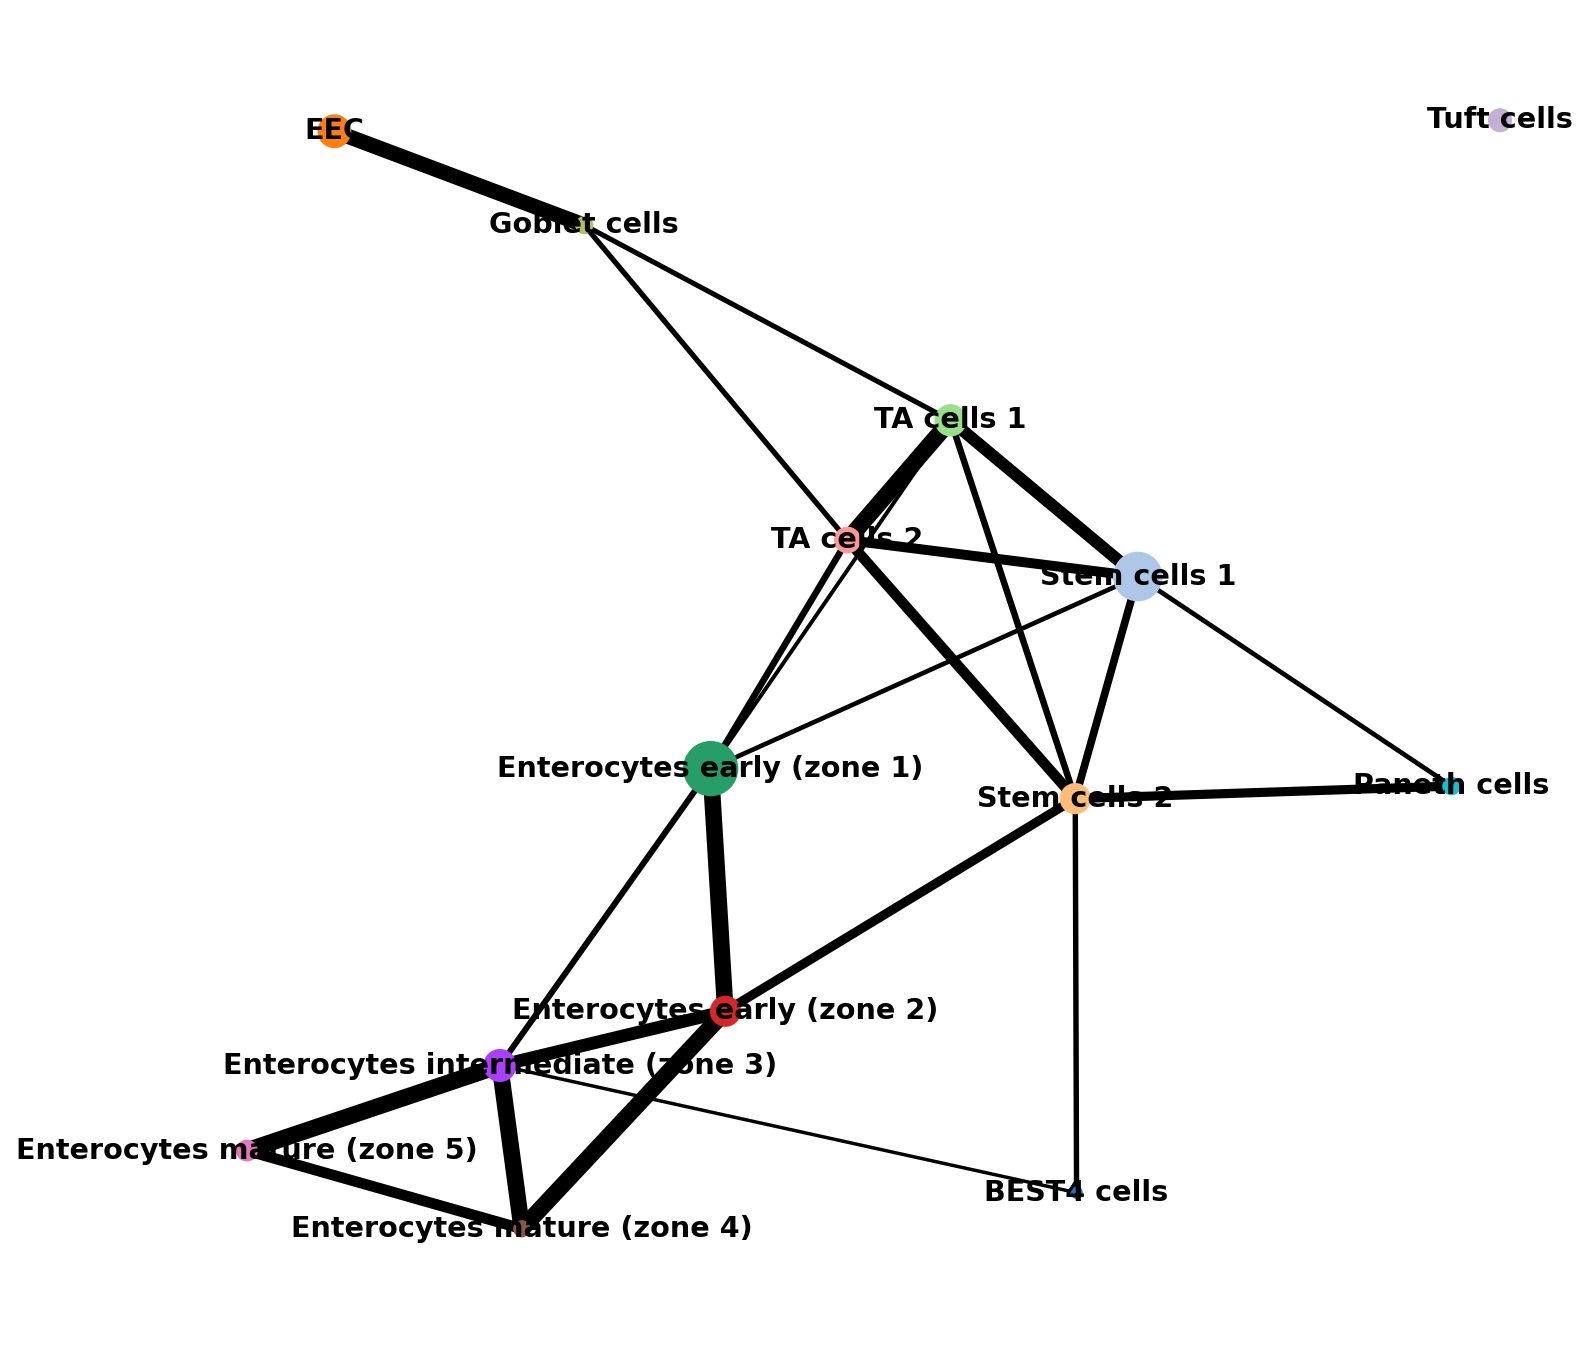

In [46]:
# Plotting PAGA - CeD
sc.settings.set_figure_params(dpi=80, frameon=False, figsize=(10, 10), facecolor='white')
sc.pl.paga(ced, layout = 'fr', threshold = 0.2,node_size_power = 1)